## Predicting Counseling_Service_Use

In [99]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

# Ignore warnings
warnings.filterwarnings("ignore")

In [1]:
# Load the CSV data into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fiverr/mchenry/students_mental_health_survey.csv")

In [2]:
# Display the DataFrame
df

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,20,Law,Female,3.69,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,24,Medical,Male,3.65,4,3,4,Average,High,Poor,Moderate,Single,Never,Never,No,Yes,4,Moderate,18,Off-Campus


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

## Exploratory Data Analysis (EDA)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Column: Age
21    776
18    735
20    721
19    708
22    690
23    637
24    537
25    454
26    454
27    323
28    257
29    188
30    162
31    124
32     98
33     55
34     45
35     31
Name: Age, dtype: int64


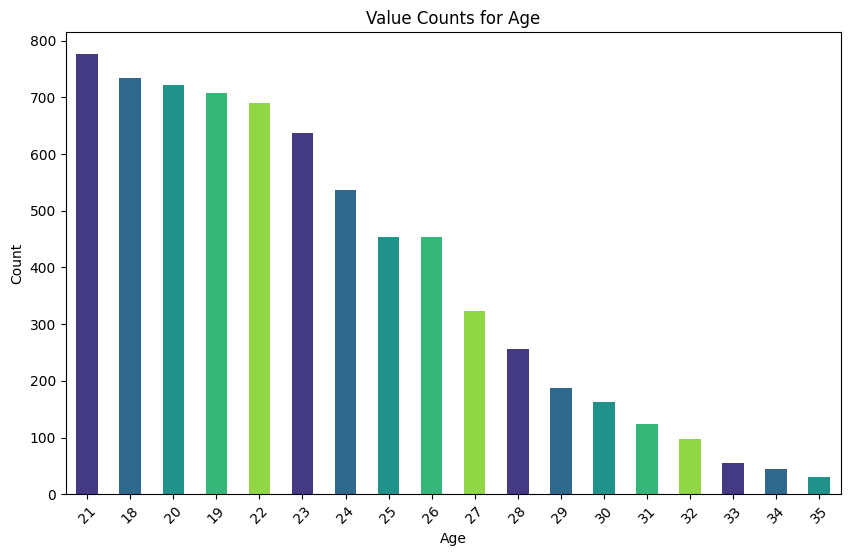


Column: Course
4    2096
3    1381
2    1067
1    1022
0     715
5     714
Name: Course, dtype: int64


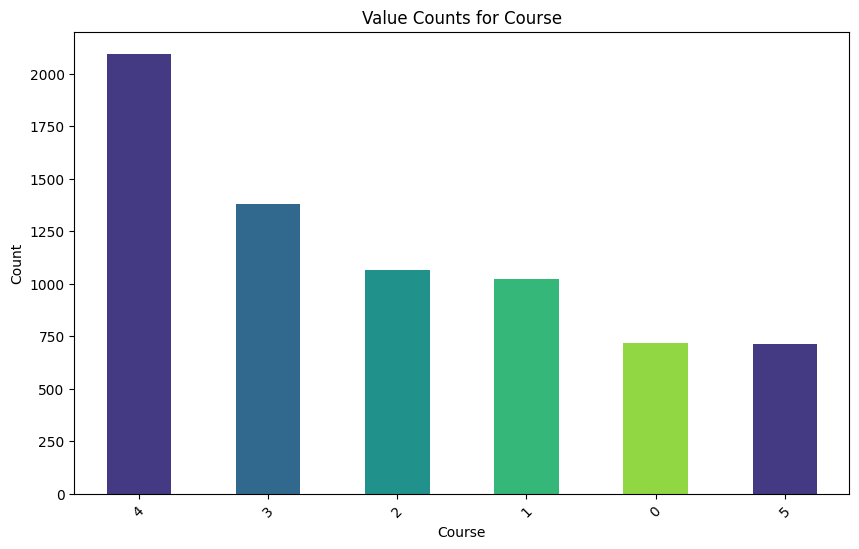


Column: Gender
1    3536
0    3459
Name: Gender, dtype: int64


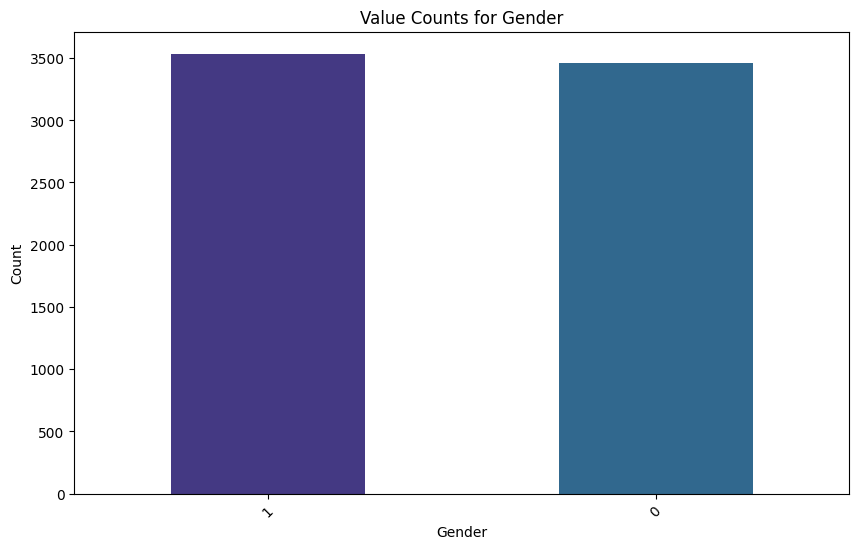


Column: CGPA
4.00    332
3.58    106
3.51    106
3.55    105
3.50    103
       ... 
2.66      1
2.63      1
2.71      1
2.49      1
2.67      1
Name: CGPA, Length: 143, dtype: int64


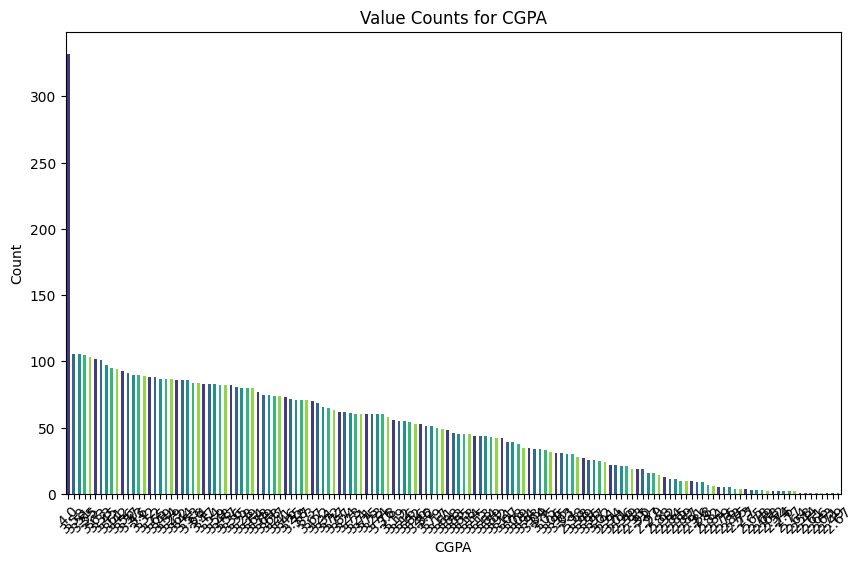


Column: Stress_Level
3    1397
2    1274
1    1226
0    1094
5    1013
4     991
Name: Stress_Level, dtype: int64


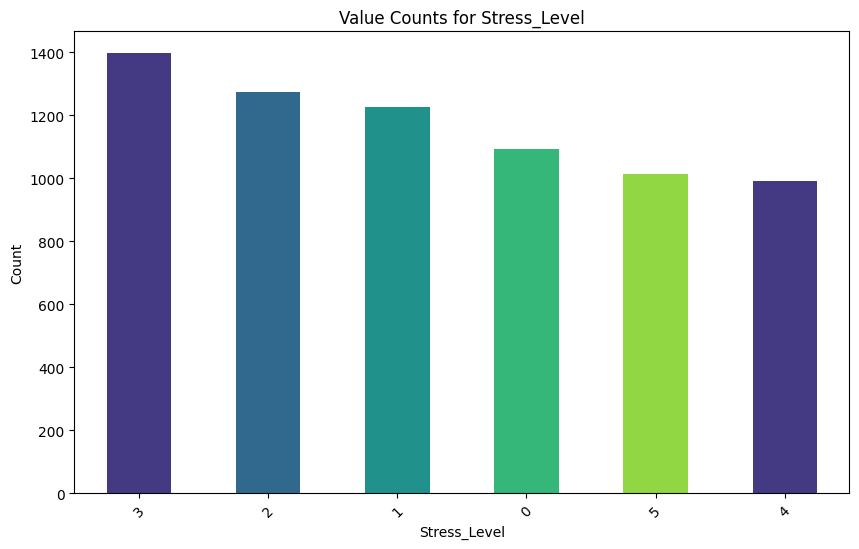


Column: Depression_Score
3    1385
1    1303
2    1300
0    1288
4     878
5     841
Name: Depression_Score, dtype: int64


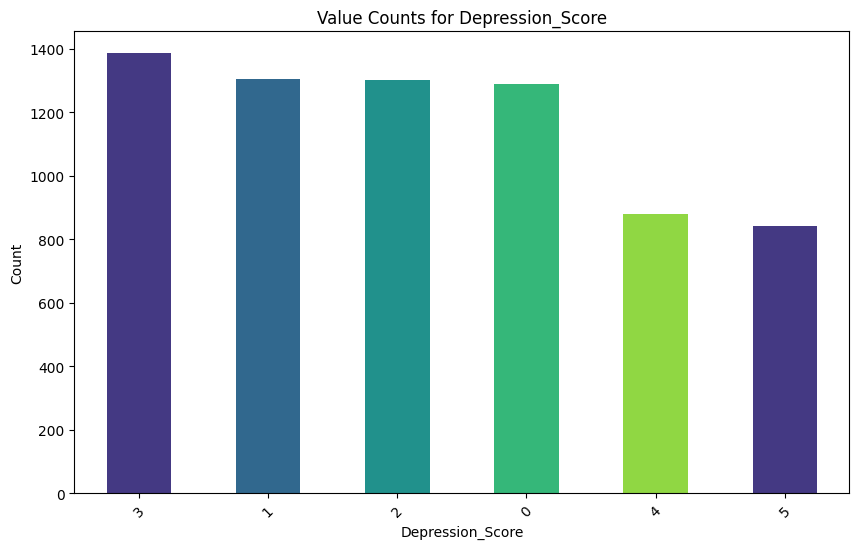


Column: Anxiety_Score
3    1423
2    1293
1    1267
0    1234
4     907
5     871
Name: Anxiety_Score, dtype: int64


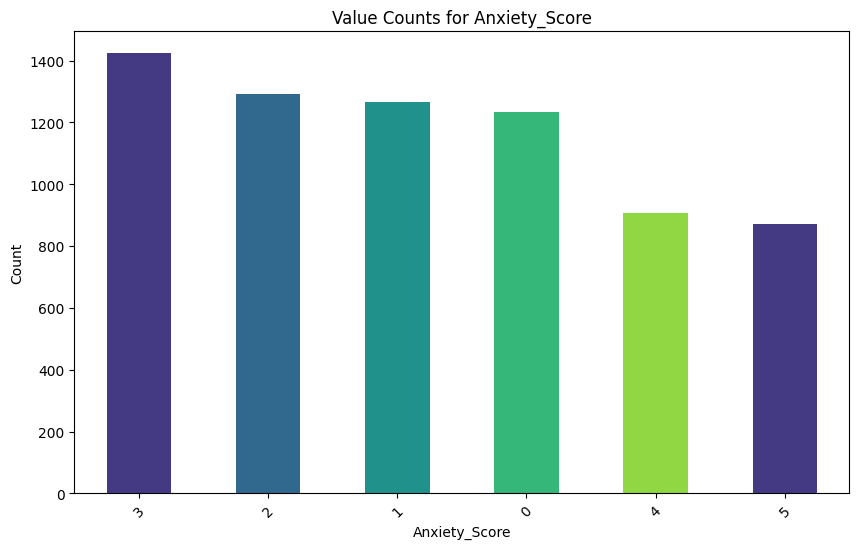


Column: Sleep_Quality
1    3579
0    2721
2     695
Name: Sleep_Quality, dtype: int64


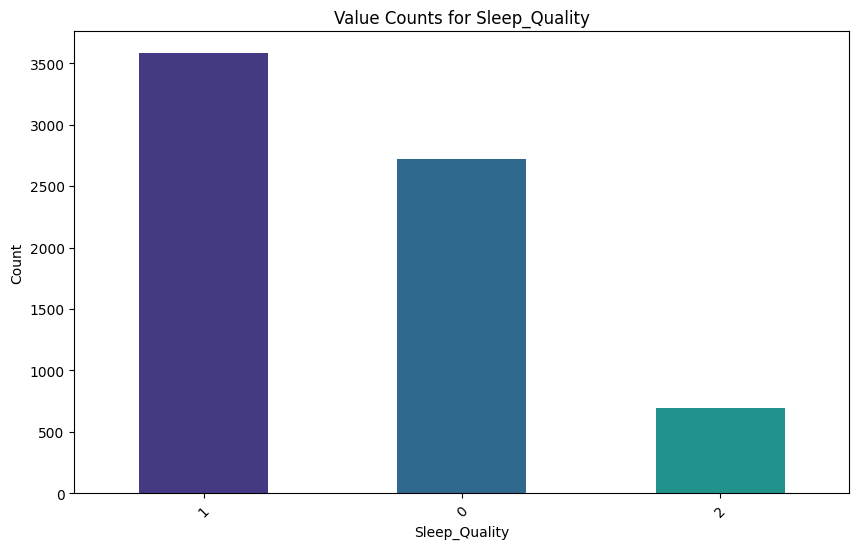


Column: Physical_Activity
2    3505
1    2085
0    1405
Name: Physical_Activity, dtype: int64


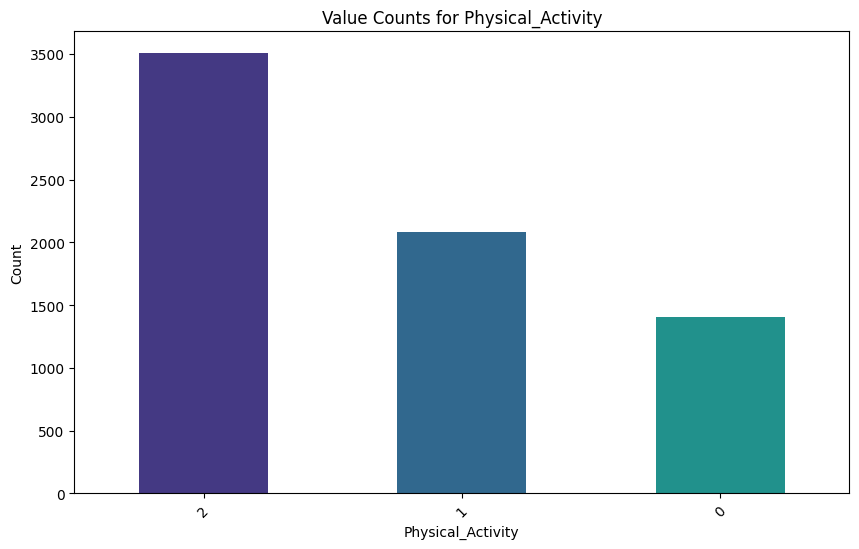


Column: Diet_Quality
0    4253
1    1379
2    1363
Name: Diet_Quality, dtype: int64


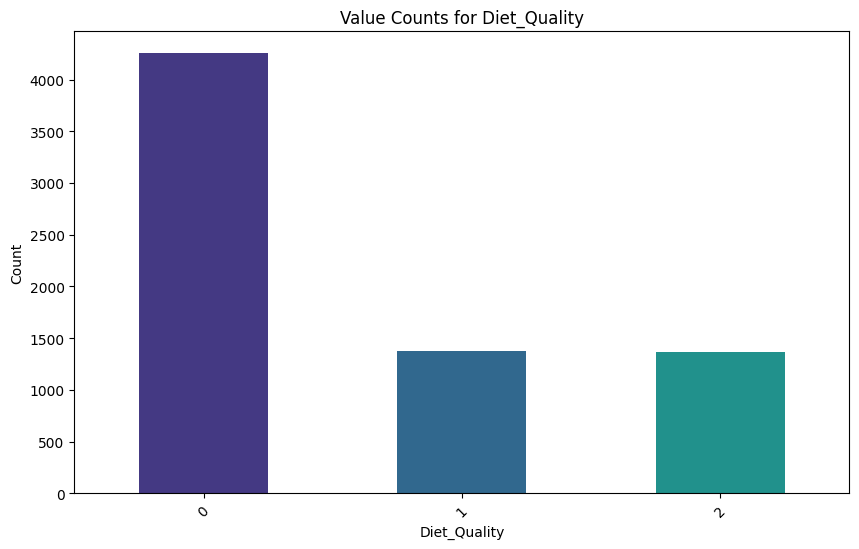


Column: Social_Support
2    3457
0    2165
1    1373
Name: Social_Support, dtype: int64


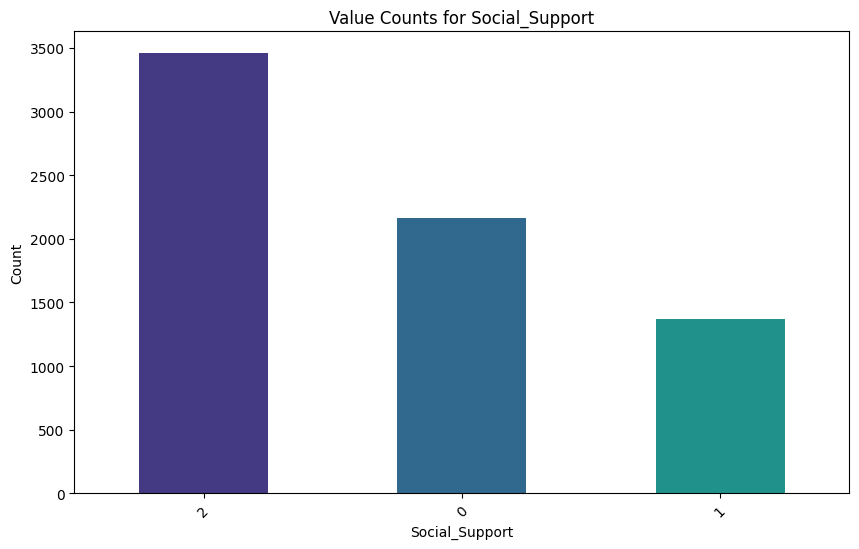


Column: Relationship_Status
2    3562
0    2069
1    1364
Name: Relationship_Status, dtype: int64


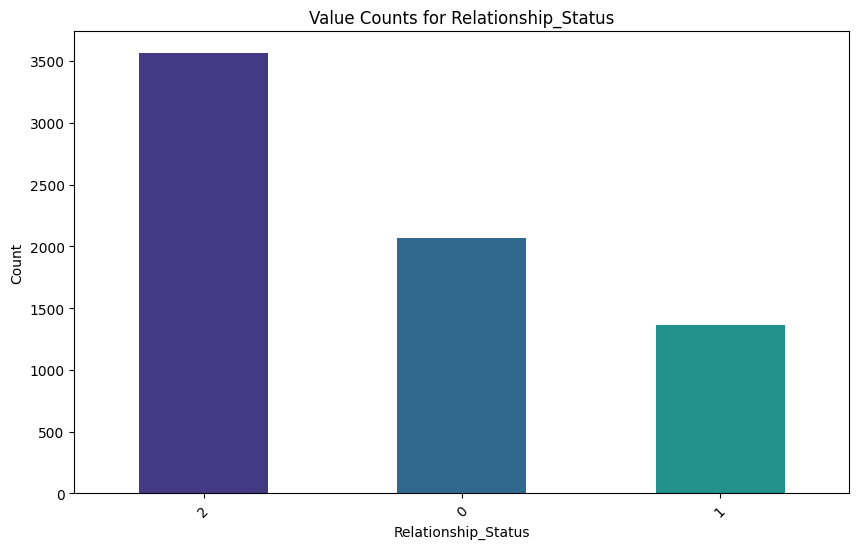


Column: Substance_Use
1    5894
2     697
0     404
Name: Substance_Use, dtype: int64


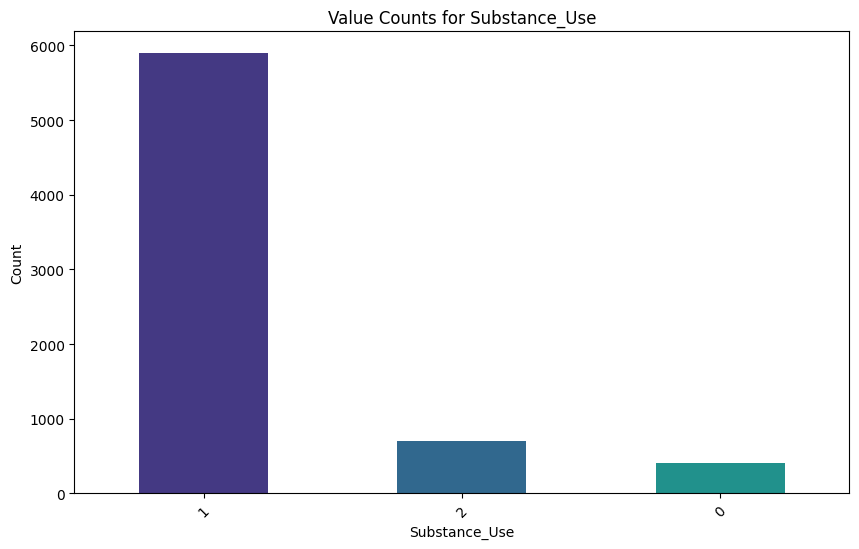


Column: Counseling_Service_Use
1    4250
2    2069
0     676
Name: Counseling_Service_Use, dtype: int64


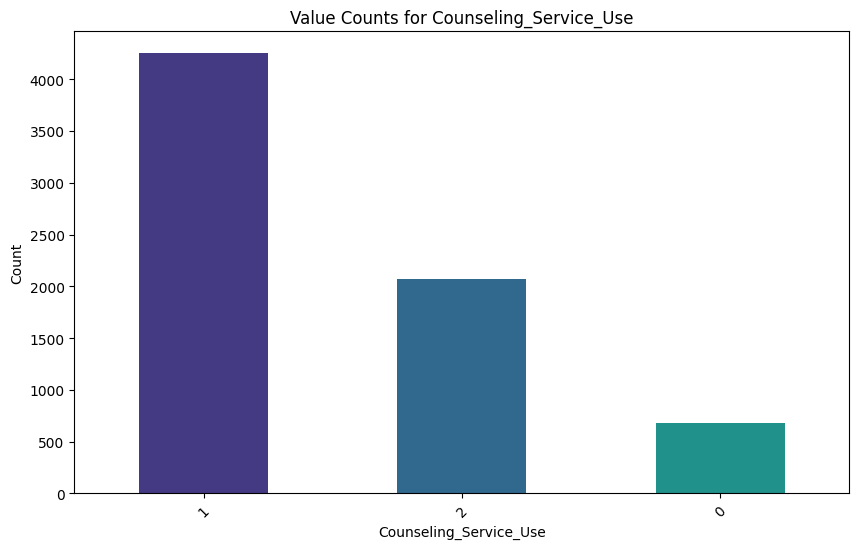


Column: Family_History
0    4844
1    2151
Name: Family_History, dtype: int64


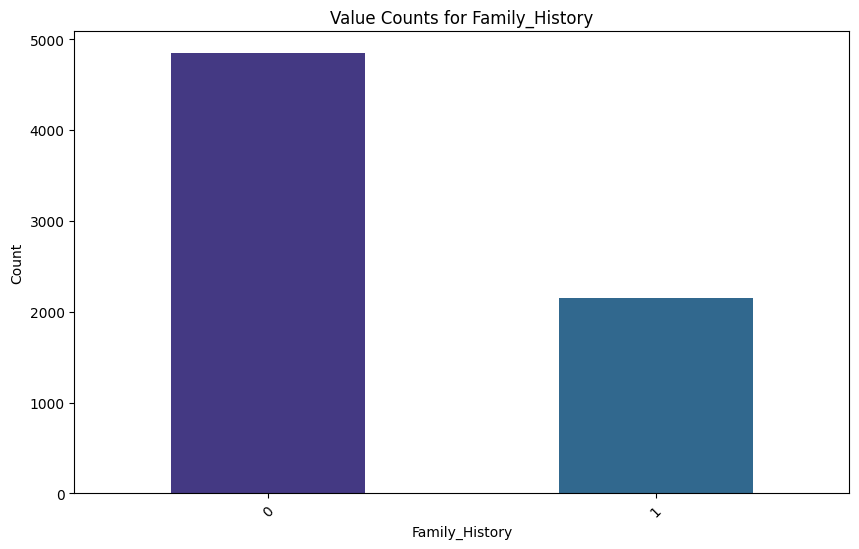


Column: Chronic_Illness
0    6652
1     343
Name: Chronic_Illness, dtype: int64


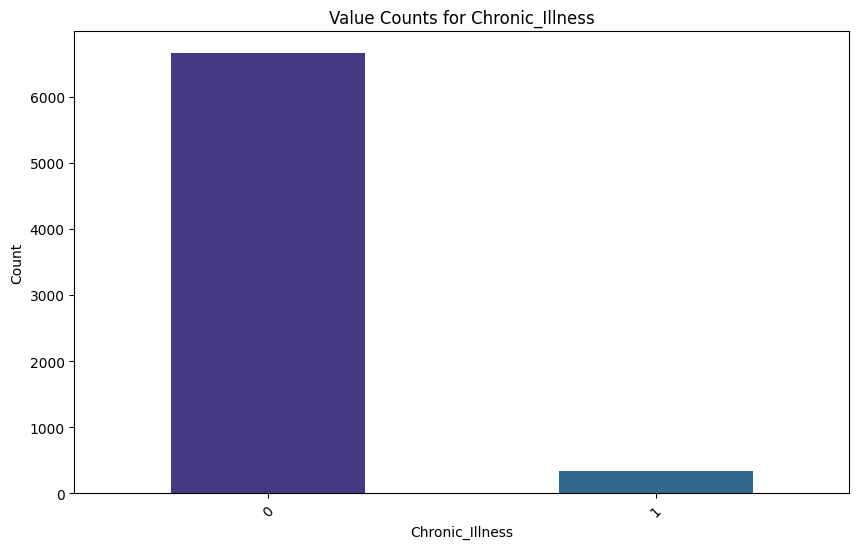


Column: Financial_Stress
0    1225
1    1181
2    1168
4    1156
3    1152
5    1113
Name: Financial_Stress, dtype: int64


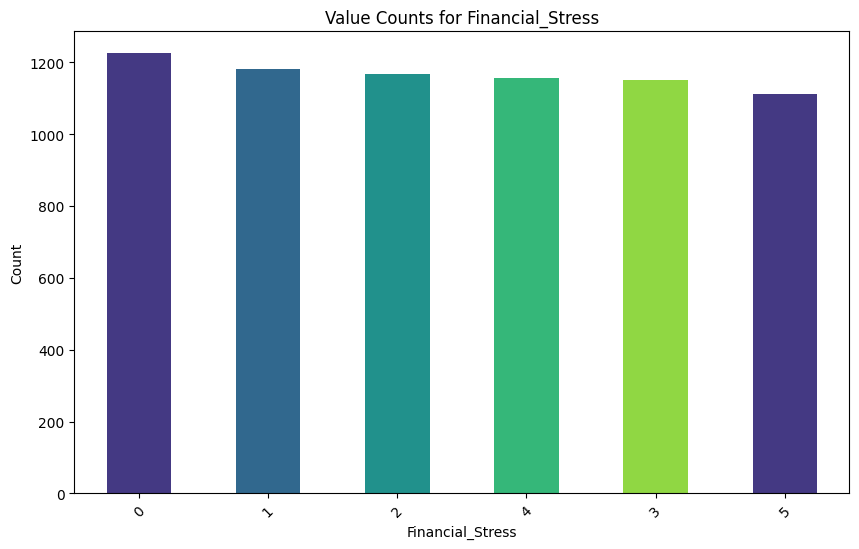


Column: Extracurricular_Involvement
2    3426
1    2157
0    1412
Name: Extracurricular_Involvement, dtype: int64


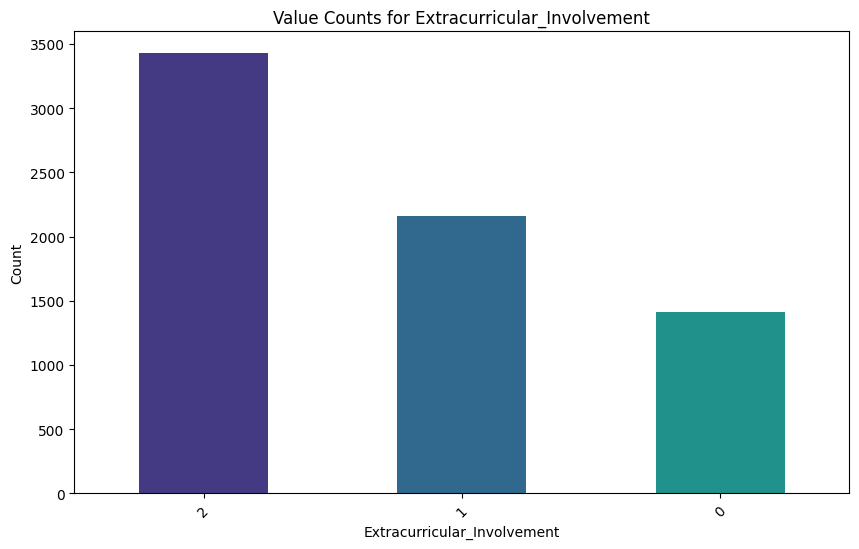


Column: Semester_Credit_Load
27    511
17    506
28    490
15    471
18    467
19    466
16    465
24    463
29    460
25    458
22    455
26    455
23    446
21    443
20    439
Name: Semester_Credit_Load, dtype: int64


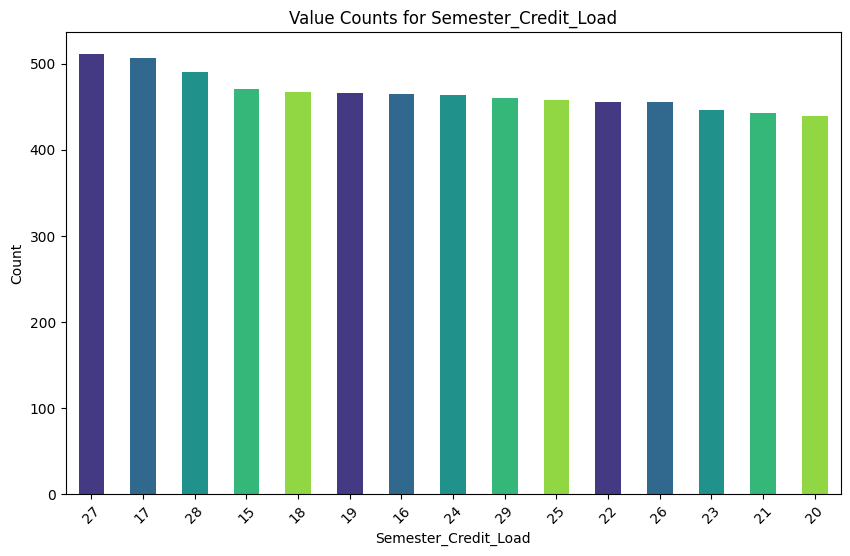


Column: Residence_Type
1    2805
0    2774
2    1416
Name: Residence_Type, dtype: int64


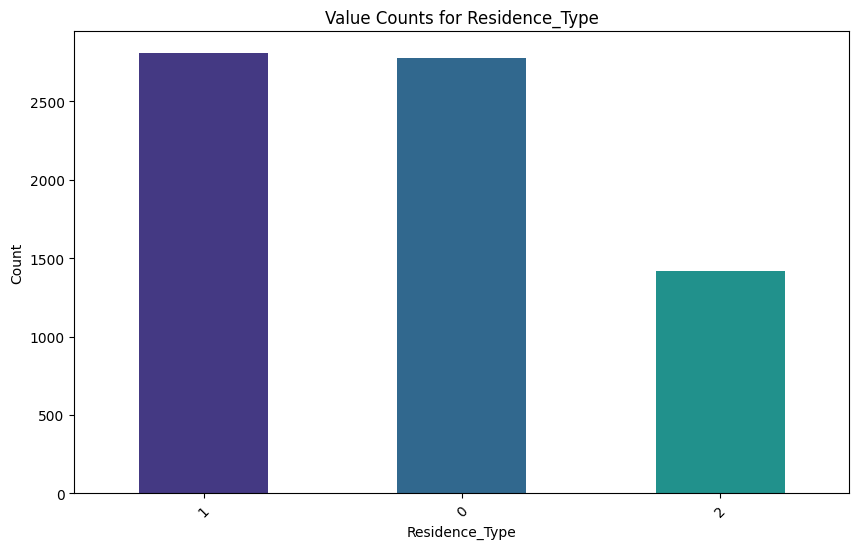

In [83]:
# Set the color palette
palette = sns.color_palette("viridis", 5)

# Loop through each column
for column in df.columns:
    # Print column name
    print("Column:", column)

    # Print value counts
    print(df[column].value_counts())

    # Plot value counts if the column is categorical

    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar',color=palette)
    plt.title(f'Value Counts for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    print()

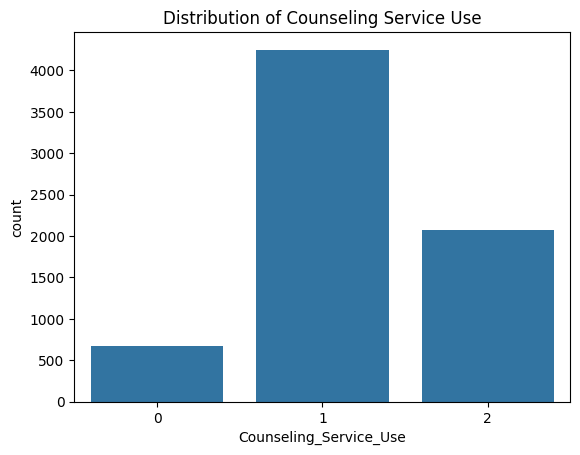

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of target variable
sns.countplot(x='Counseling_Service_Use', data=df)
plt.title('Distribution of Counseling Service Use')
plt.show()

## Data Preprocessing

In [6]:
# Check for missing values
print(df.isnull().sum())

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64


In [7]:
df = df.dropna()
print(df.isnull().sum())

Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column
for column in df.columns:
    # Check if the column dtype is object (categorical)
    if df[column].dtype == 'object':
        # Fit label encoder and transform values
        df.loc[:, column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame with encoded categorical values
df

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,5,1,3.56,3,3,2,1,2,1,2,1,1,1,0,0,2,2,17,1
1,24,2,0,2.44,0,3,0,0,1,0,1,2,2,2,0,0,3,1,27,1
2,19,0,0,3.74,4,0,3,1,1,0,2,0,1,2,0,0,4,0,15,1
4,18,0,1,3.40,3,3,4,1,1,0,0,1,1,1,0,1,0,0,23,1
5,21,4,0,3.35,2,4,3,1,2,1,0,2,1,1,0,0,5,2,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,20,3,0,3.33,1,1,1,0,1,0,2,0,1,2,0,0,3,2,29,0
7017,20,3,0,3.69,3,1,5,1,1,2,0,2,1,0,1,0,1,0,26,0
7018,24,4,0,3.73,3,4,1,1,2,0,0,2,1,2,0,0,3,1,15,0
7019,26,5,1,3.65,4,5,1,1,0,2,2,1,1,2,0,1,4,2,17,0


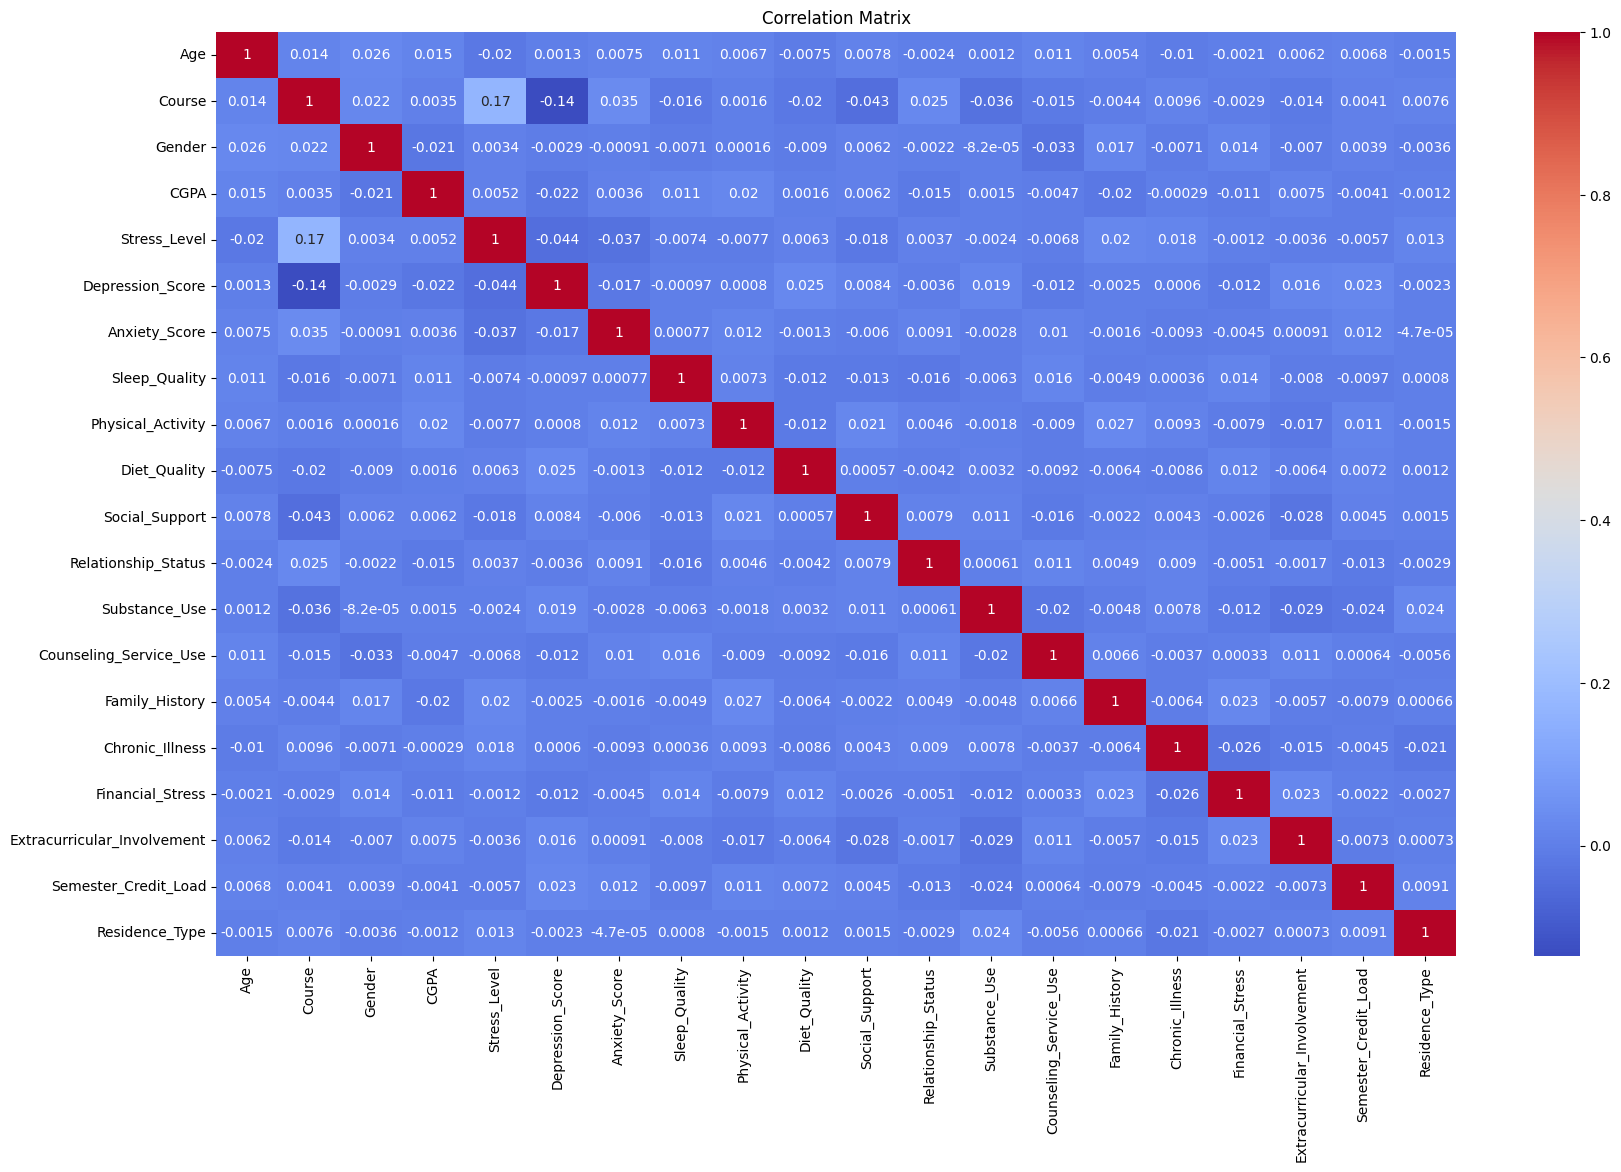

In [17]:
# Explore correlations between features
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Define features and target variable
X = df.drop(columns=['Counseling_Service_Use'])
y = df['Counseling_Service_Use']

In [65]:
y.value_counts()

1    4250
2    2069
0     676
Name: Counseling_Service_Use, dtype: int64

In [86]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [87]:
# from imblearn.over_sampling import RandomOverSampler

# X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)

In [88]:
y_test.value_counts()

1    850
2    414
0    135
Name: Counseling_Service_Use, dtype: int64

In [89]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML Models

## RandomForestClassifier

In [98]:
rf_model = RandomForestClassifier(n_estimators=35, random_state=1)

rf_model.fit(X_train, y_train)

# Predictions
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

# Evaluating the model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Random forest Train Accuracy:", train_accuracy)
print("Random forest Test Accuracy:", test_accuracy)

Random forest Train Accuracy: 0.9996426018584703
Random forest Test Accuracy: 0.6040028591851322


## Support vectors

In [91]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_train_preds = svm_model.predict(X_train)
svm_test_preds = svm_model.predict(X_test)

svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)

print("SVM Train Accuracy:", svm_train_accuracy)
print("SVM Test Accuracy:", svm_test_accuracy)

SVM Train Accuracy: 0.6075768406004288
SVM Test Accuracy: 0.6075768406004288


## KNN

In [95]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)

knn_train_preds = knn_model.predict(X_train)
knn_test_preds = knn_model.predict(X_test)

knn_train_accuracy = accuracy_score(y_train, knn_train_preds)
knn_test_accuracy = accuracy_score(y_test, knn_test_preds)

print("KNN Train Accuracy:", knn_train_accuracy)
print("KNN Test Accuracy:", knn_test_accuracy)

KNN Train Accuracy: 0.6122230164403145
KNN Test Accuracy: 0.5982844889206577


## Logistic Regression

In [93]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_train_preds = logistic_model.predict(X_train)
logistic_test_preds = logistic_model.predict(X_test)

logistic_train_accuracy = accuracy_score(y_train, logistic_train_preds)
logistic_test_accuracy = accuracy_score(y_test, logistic_test_preds)

print("Logistic Regression Train Accuracy:", logistic_train_accuracy)
print("Logistic Regression Test Accuracy:", logistic_test_accuracy)

Logistic Regression Train Accuracy: 0.6075768406004288
Logistic Regression Test Accuracy: 0.6075768406004288


## Decision Trees

In [94]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

dt_train_preds = dt_model.predict(X_train)
dt_test_preds = dt_model.predict(X_test)

dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)

print("Decision Tree Train Accuracy:", dt_train_accuracy)
print("Decision Tree Test Accuracy:", dt_test_accuracy)

Decision Tree Train Accuracy: 0.6147248034310222
Decision Tree Test Accuracy: 0.6068620443173696


## Deep learning model

In [101]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)

nn_train_preds = nn_model.predict(X_train)
nn_test_preds = nn_model.predict(X_test)

nn_train_accuracy = accuracy_score(y_train, nn_train_preds)
nn_test_accuracy = accuracy_score(y_test, nn_test_preds)

print("Neural Network Train Accuracy:", nn_train_accuracy)
print("Neural Network Test Accuracy:", nn_test_accuracy)

Neural Network Train Accuracy: 0.6222301644031452
Neural Network Test Accuracy: 0.5975696926375983
